## Imports and Setup

In [1]:
from helper_functions import pd, os, shutil
from helper_functions import convert_samples_to_binary, get_column_data_types, print_library_versions, add_id_column, order_columns_by_correlation, organize_photos_in_folders

### Try to get library versions matching the following:

In [2]:
print_library_versions()

pandas version:           1.4.1
matplotlib version:       3.5.1
numpy version:            1.23.5
bitstring version:        3.1.9
joblib version:           1.1.0
PIL version:              9.3.0


## Data Loading and Cleaning

In [3]:
# FIXME - update the filename to point to your dataset
filename = '../data/csv/breastCancer.csv'
df = pd.read_csv(filename)

### Spend some time familiarizing yourself with your dataset. Here are some basic commands

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# NOTE:
The following code segments are specific to my dataset. This is where you will need to perform your own data cleaning!!!
<br />
<br />
This will be the most difficult/time intensive aspect! Everything else will be plug and play!

In [6]:
def add_id_column(df: pd.DataFrame, column_name: str) -> pd.DataFrame:
    """
    Adds a new column to a pandas DataFrame with unique identifiers for each value in a specified column.

    Args:
        df (pandas.DataFrame): The DataFrame to modify.
        column_name (str): The name of the column to use for generating unique identifiers.

    Returns:
        pandas.DataFrame: The modified DataFrame with the new 'Id' column.
    """
    if 'Id' not in df.columns:
        df['Id'] = ''

    unique_values = df[column_name].unique().tolist()
    values_dict = {value: 0 for value in unique_values}
    for index, row in df.iterrows():
        value = row[column_name]
        values_dict[value] += 1
        name = str(values_dict[value]) + "-" + value
        df.at[index, 'Id'] = name
    return df

In [7]:
# FIXME - change the value 'species' to match the 'y' value of your dataset
# This function will give your dataframe an 'id' column which will be used to identify the samples in the dataset
# The 'id' column will be used to name the photos of the samples

classification_id = 'diagnosis'
df = add_id_column(df, classification_id)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Id
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1-M
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,2-M
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,3-M
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,4-M
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,5-M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,209-M
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,210-M
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,211-M
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,212-M


In [8]:
# FIXME - Perform any data cleaning or preprocessing steps here!
# For example, if you have missing values, you can fill them in with the mean value of the column or drop them
# Look at our past work for examples of how to do this
# Kaggle is another good resource

#def diagnosis_to_binary(row):
 #   if row.diagnosis == 'M':
  #      row.diagnosis = 1
   # elif row.diagnosis == 'B':
    #    row.diagnosis = 0
    #return row

#df.apply(diagnosis_to_binary, axis='columns')

In [9]:
# FIXME - get the correct values in the x and Y variables for your dataset
# As long as you have the correct value in `classification_id` from earlier, you shouldn't need any changes here unless there is another column you want to drop
# For instance, if you have an overfit feature such as a timestamp, you can drop it here
Y = df[classification_id]
x = df.drop([classification_id, 'id', 'Id'], axis=1)
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (569, 30)
Y (569,)
This value should be True: True


## Image Generation

In [15]:
def organize_photos_in_folders(image_directory : str, Y : pd.DataFrame) -> None:
    '''
        Organize the photos in the folder into subfolders based on the label
        
        Args:
            image_directory (str): The directory to save the images to.
            Y (pd.DataFrame): The pandas dataframe ids values to be converted to binary.
    '''
    dirs = Y.unique().tolist()
    if not os.path.exists(image_directory + '/data'):
        os.mkdir(image_directory + '/data')
    new_dir = image_directory + '/data/'
    if not os.path.exists(new_dir+'Train/'):
        os.mkdir(new_dir+'Train/')
    for i in dirs:
        i = str(i)#.split('-')[1]
        if not os.path.exists(new_dir+'Train/'+i):
            os.mkdir(new_dir+'Train/'+i)
    
    total_images = 0
    type_counts = {value: 0 for value in dirs}
    for file in os.listdir(image_directory):
        try:
            dir = file.split("-")[1].split(".")[0]
            type_counts[dir]+=1
        except:
            continue
        
        shutil.move(f"{image_directory}/{file}", f"{new_dir}Train/{dir}/{file}")
        total_images += 1
    print(total_images)
    print(type_counts)

In [16]:
# FIXME - update `image_directory`` to point to a directory where you want the images to be saved. 
# Change any other constants you want to change

# image_directory = "results_breastCancer"
image_directory = "../data/images/image-results-cancer"
feature_types = get_column_data_types(x)
# Precision: the number of binary digits to use for each feature (use a power of 2)
precision = 64
# one: the value to use for a 1 in the binary representation (128 is a dark pixel)
one = 128
zero = 0
# num_jobs: the number of jobs to run in parallel (-1 means use all available cores)
n_jobs = -1
# For feature_types, 0 = float, 1 = int, 2 = bool
# Notice mine are all 0's because I only have float values in my dataset, you may have different values
print(feature_types)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [17]:
convert_samples_to_binary(x, df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

Time to convert 569 samples to binary: 0.18066048622131348 seconds. Seconds per sample = 0.00031750524819211507


## Place Folders into the Correct Categories

In [18]:
organize_photos_in_folders(image_directory, Y)

569
{'M': 212, 'B': 357}


In [19]:
#FIXME Upload your photos to the Google Drive Data Folder!

## Train ResNet50
If you used my yaml files where there are two conda environments, this is the stage where you will change to the `keras_gpu` environment. If you used the alternative method, you should be in the correct environment already.

### Once experiments are running, view the live updates on TensorBoard
Run the command `tensorboard --logdir=[your log directory]` in the terminal. 
<br />
<br />
Then, open a browser and navigate to `localhost:6006`.
<br />
<br />
![TensorBoard](./tensorboard.png)

In [20]:
from resnet import print_dl_versions, train_resnet_model_k_fold, evaluate_on_test_data, plot_metrics

In [21]:
# FIXME - update the values below to match your dataset
# Multiple of 2 such that it is greater than or equal to the number of features you have
img_size = 64
target_size = (img_size,img_size)
# Number of classification types (classes) in your dataset
num_classes = 2
# Number of samples to run through the model before updating the weights
# Higher batch size means more memory is required and training will be faster. Maybe use 64 for larger datasets
batch_size = 32
# Number of times to run through training a model
# Depending on the size of your dataset, you may want to increase/decrease this number
num_folds = 5
# Number of times to run through the entire dataset
number_of_epochs = 100

In [22]:
#Changed values to tune for results
#In resnet.py -> get_callbacks() -> patiences to stop=35 & patience to reduce lr=25
new_dir = image_directory + '/data'
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

Fold:  0
Found 456 images belonging to 2 classes.
Found 113 images belonging to 2 classes.


c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/100
15/15 [==============================] - 29s 740ms/step - loss: 1.2942 - acc: 0.6096 - f1_m: 0.5979 - precision_m: 0.5979 - recall_m: 0.5979 - auc: 0.6510 - false_negatives: 178.0000 - false_positives: 178.0000 - true_negatives: 278.0000 - true_positives: 278.0000 - mean_absolute_error: 0.4129 - mean_squared_error: 0.2812 - val_loss: 714478976.0000 - val_acc: 0.6283 - val_f1_m: 0.6512 - val_precision_m: 0.6512 - val_recall_m: 0.6512 - val_auc: 0.6283 - val_false_negatives: 42.0000 - val_false_positives: 42.0000 - val_true_negatives: 71.0000 - val_true_positives: 71.0000 - val_mean_absolute_error: 0.3717 - val_mean_squared_error: 0.3717

Epoch 00001: val_acc improved from -inf to 0.62832, saving model to ../data/images/image-results-cancer/results\fold0-resnet50v2-saved-model-01-val_acc-0.63.hdf5
Epoch 2/100
15/15 [==============================] - 1s 53ms/step - loss: 0.5384 - acc: 0.7061 - f1_m: 0.6958 - precision_m: 0.6958 - recall_m: 0.6958 - auc: 0.7968 - false_negative

In [23]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.028532791225006803, 'acc': 0.9912280797958374, 'f1_m': 0.9916666626930237, 'precision_m': 0.9916666626930237, 'recall_m': 0.9916666626930237, 'auc': 1.0, 'false_negatives': 0.0, 'false_positives': 0.0, 'true_negatives': 456.0, 'true_positives': 456.0, 'mean_absolute_error': 0.011300419829785824, 'mean_squared_error': 0.007175804994903956, 'val_loss': 2.1305239841341974, 'val_acc': 0.838938045501709, 'val_f1_m': 0.8371323049068451, 'val_precision_m': 0.8371323466300964, 'val_recall_m': 0.8371323466300964, 'val_auc': 0.9765055775642395, 'val_false_negatives': 6.0, 'val_false_positives': 6.0, 'val_true_negatives': 107.0, 'val_true_positives': 107.0, 'val_mean_absolute_error': 0.16110670641064645, 'val_mean_squared_error': 0.14925619550049304, 'lr': 0.001999999862164259}


In [24]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.07206743955612183, 'acc': 0.9802631735801697, 'f1_m': 0.981249988079071, 'precision_m': 0.981249988079071, 'recall_m': 0.981249988079071, 'auc_1': 0.9952821731567383, 'false_negatives_1': 9.0, 'false_positives_1': 9.0, 'true_negatives_1': 447.0, 'true_positives_1': 447.0, 'mean_absolute_error': 0.029747862368822098, 'mean_squared_error': 0.018439041450619698, 'val_loss': 0.08611210435628891, 'val_acc': 0.9646017551422119, 'val_f1_m': 0.96875, 'val_precision_m': 0.96875, 'val_recall_m': 0.96875, 'val_auc_1': 0.995457649230957, 'val_false_negatives_1': 4.0, 'val_false_positives_1': 4.0, 'val_true_negatives_1': 109.0, 'val_true_positives_1': 109.0, 'val_mean_absolute_error': 0.04322722181677818, 'val_mean_squared_error': 0.02448807656764984, 'lr': 0.0019999999}


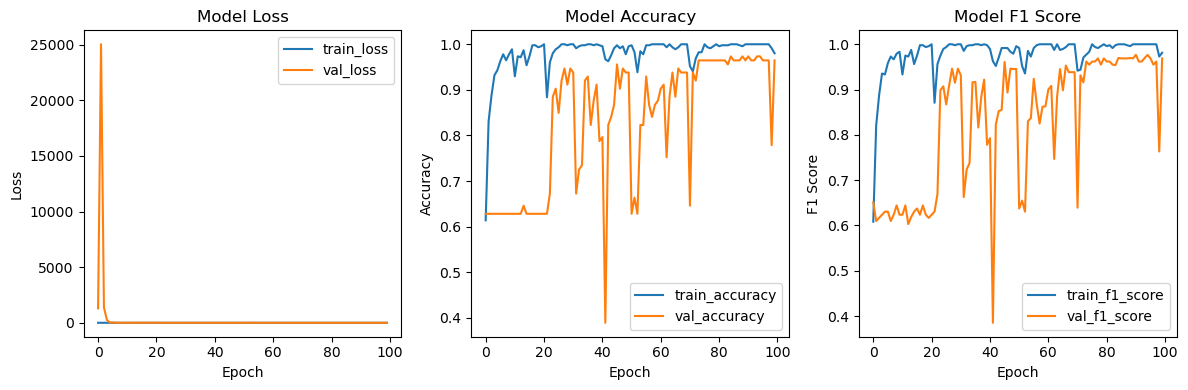

In [25]:
plot_metrics(best_model.history)

# Correlated Binary Encoding

In [26]:
#FIXME - update the directories to point where you would like
image_directory = "C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/images/image-results-cancer-correlated"
# new_dir = image_directory + '/data/'
new_dir = image_directory + '/data'

In [27]:
correlated_order = order_columns_by_correlation(df, classification_id, True)

ordering columns by correlation: diagnosis, 33, ['M' 'B']


In [29]:
correlated_df = df.reindex(columns=correlated_order)

In [30]:
# x = correlated_df.drop([classification_id, 'Id', 'id'], axis=1)
x = correlated_df.drop([classification_id, 'Id'], axis=1)
Y = correlated_df[classification_id]
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (569, 31)
Y (569,)
This value should be True: True


In [31]:
# FIXME - update the image directory to point to a directory where you want the images to be saved. Create a folder there.
# Change any other constants you want to change
#image_directory = "../breastCancer-Data/image-results-breastCancer-correlated"
feature_types = get_column_data_types(x)
# For feature_types, 0 = float, 1 = int, 2 = bool
print(feature_types)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [32]:
convert_samples_to_binary(x, correlated_df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

Time to convert 569 samples to binary: 4.975690841674805 seconds. Seconds per sample = 0.008744623623330061


In [33]:
organize_photos_in_folders(image_directory, Y)

569
{'M': 212, 'B': 357}


In [34]:
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

Fold:  0
Found 456 images belonging to 2 classes.
Found 113 images belonging to 2 classes.


c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/100
15/15 [==============================] - 19s 964ms/step - loss: 0.9995 - acc: 0.6404 - f1_m: 0.6333 - precision_m: 0.6333 - recall_m: 0.6333 - auc_5: 0.7029 - false_negatives_5: 164.0000 - false_positives_5: 164.0000 - true_negatives_5: 292.0000 - true_positives_5: 292.0000 - mean_absolute_error: 0.3788 - mean_squared_error: 0.2489 - val_loss: 483288.8438 - val_acc: 0.6283 - val_f1_m: 0.6512 - val_precision_m: 0.6512 - val_recall_m: 0.6512 - val_auc_5: 0.6283 - val_false_negatives_5: 42.0000 - val_false_positives_5: 42.0000 - val_true_negatives_5: 71.0000 - val_true_positives_5: 71.0000 - val_mean_absolute_error: 0.3717 - val_mean_squared_error: 0.3717

Epoch 00001: val_acc improved from -inf to 0.62832, saving model to C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/images/image-results-cancer-correlated/results\fold0-resnet50v2-saved-model-01-val_acc-0.63.hdf5
Epoch 2/100
15/15 [==============================] - 1s 63ms/step - loss: 0.5838 - acc: 0.7171 -

In [ ]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.015089686459396035, 'acc': 0.9956140398979187, 'f1_m': 0.9933333277702332, 'precision_m': 0.9933333277702332, 'recall_m': 0.9933333277702332, 'auc': 0.999927818775177, 'false_negatives': 1.0, 'false_positives': 1.0, 'true_negatives': 455.0, 'true_positives': 455.0, 'mean_absolute_error': 0.010259499552194028, 'mean_squared_error': 0.0036055709963875417, 'val_loss': 0.2826164573431015, 'val_acc': 0.9150442361831665, 'val_f1_m': 0.9139705300331116, 'val_precision_m': 0.9139705896377563, 'val_recall_m': 0.9139705896377563, 'val_auc': 0.9879395365715027, 'val_false_negatives': 7.0, 'val_false_positives': 7.0, 'val_true_negatives': 106.0, 'val_true_positives': 106.0, 'val_mean_absolute_error': 0.09510615020990372, 'val_mean_squared_error': 0.0674678422510624, 'lr': 0.00010159999310417333}


In [ ]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.017626380547881126, 'acc': 0.9978070259094238, 'f1_m': 0.9979166388511658, 'precision_m': 0.9979166388511658, 'recall_m': 0.9979166388511658, 'auc': 0.999927818775177, 'false_negatives': 1.0, 'false_positives': 1.0, 'true_negatives': 455.0, 'true_positives': 455.0, 'mean_absolute_error': 0.01448414009064436, 'mean_squared_error': 0.003192526288330555, 'val_loss': 0.14209182560443878, 'val_acc': 0.9380530714988708, 'val_f1_m': 0.9453124403953552, 'val_precision_m': 0.9453125, 'val_recall_m': 0.9453125, 'val_auc': 0.9879395365715027, 'val_false_negatives': 7.0, 'val_false_positives': 7.0, 'val_true_negatives': 106.0, 'val_true_positives': 106.0, 'val_mean_absolute_error': 0.09089631587266922, 'val_mean_squared_error': 0.04687226191163063, 'lr': 0.00049999997}


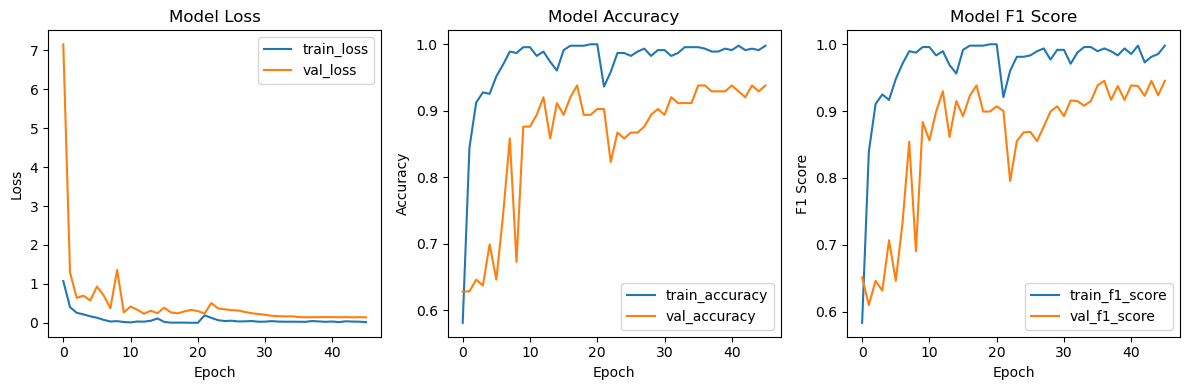

In [ ]:
plot_metrics(best_model.history)

# IGTD

In [ ]:
from IGTD_Functions import min_max_transform, table_to_image, generate_feature_distance_ranking,generate_matrix_distance_ranking,IGTD,run

In [ ]:
save_image_size = 3 # Size of ranking pictures
max_step = 100000    # The maximum number of iterations to run the IGTD algorithm, if it does not converge.
val_step = 300  # The number of iterations for determining algorithm convergence. If the error reduction rate
                # is smaller than a pre-set threshold for val_step itertions, the algorithm converges.
fea_dist_method = 'Euclidean'
image_dist_method = 'Euclidean'
error = 'squared'
result_dir = "C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/images/image-results-Cancer-IGTD"

In [ ]:
def normalize_data(data):
    norm_data = min_max_transform(data.values)
    norm_data = pd.DataFrame(norm_data, columns=data.columns, index=data.index)
    return norm_data

In [ ]:
df = df.set_index('Id')

In [ ]:
normalized_data = normalize_data(df.drop([classification_id],  axis=1))

In [ ]:
import numpy as np
zero_cols = pd.DataFrame(0, index=normalized_data.index, columns=['zero0', 'zero1', 'zero2', 'zero3', 'zero4'])
normalized_data = pd.concat([normalized_data, zero_cols], axis=1)
normalized_data

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,zero0,zero1,zero2,zero3,zero4
Id,,,,,,,,,,,,,,,,,,,,,
1-M,0.000915,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.619292,0.568610,0.912027,0.598462,0.418864,0,0,0,0,0
2-M,0.000915,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.154563,0.192971,0.639175,0.233590,0.222878,0,0,0,0,0
3-M,0.092495,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.385375,0.359744,0.835052,0.403706,0.213433,0,0,0,0,0
4-M,0.092547,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.814012,0.548642,0.884880,1.000000,0.773711,0,0,0,0,0
5-M,0.092559,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.172415,0.319489,0.558419,0.157500,0.142595,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209-M,0.001007,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.178527,0.328035,0.761512,0.097575,0.105667,0,0,0,0,0
210-M,0.001007,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.159997,0.256789,0.559450,0.198502,0.074315,0,0,0,0,0
211-M,0.001008,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.273705,0.271805,0.487285,0.128721,0.151909,0,0,0,0,0


In [ ]:
#image scale had to match size it wanted, 18 for the 18 columns
image_scale = [6,6]
scale,coordinate,normDir,min_id,index = table_to_image(normalized_data, image_scale, fea_dist_method, image_dist_method, save_image_size,
            max_step, val_step, result_dir, error)

Step 0 err: 38109643.0
Step 1 err: 37562845.0
Step 2 err: 36657423.0
Step 3 err: 34743475.0
Step 4 err: 33980955.0
Step 5 err: 33683597.0
Step 6 err: 33213181.0
Step 7 err: 31385243.0
Step 8 err: 29285469.0
Step 9 err: 28157114.0
Step 10 err: 26793628.0
Step 11 err: 25364576.0
Step 12 err: 24783832.0
Step 13 err: 23573866.0
Step 14 err: 23140638.0
Step 15 err: 22096568.0
Step 16 err: 21315498.0
Step 17 err: 20533848.0
Step 18 err: 20253526.0
Step 19 err: 19095224.0
Step 20 err: 18257046.0
Step 21 err: 17960256.0
Step 22 err: 17173634.0
Step 23 err: 17173634.0
Step 24 err: 17173634.0
Step 25 err: 17173634.0
Step 26 err: 16689042.0
Step 27 err: 15943966.0
Step 28 err: 15492198.0
Step 29 err: 15339494.0
Step 30 err: 14965736.0
Step 31 err: 14965736.0
Step 32 err: 14147996.0
Step 33 err: 13807800.0
Step 34 err: 13523972.0
Step 35 err: 13523972.0
Step 36 err: 13230778.0
Step 37 err: 13230778.0
Step 38 err: 13230778.0
Step 39 err: 13075512.0
Step 40 err: 12922468.0
Step 41 err: 12774196.0
St

In [ ]:
normalized_data

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,zero0,zero1,zero2,zero3,zero4
Id,,,,,,,,,,,,,,,,,,,,,
1-M,0.000915,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.619292,0.568610,0.912027,0.598462,0.418864,0,0,0,0,0
2-M,0.000915,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.154563,0.192971,0.639175,0.233590,0.222878,0,0,0,0,0
3-M,0.092495,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.385375,0.359744,0.835052,0.403706,0.213433,0,0,0,0,0
4-M,0.092547,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.814012,0.548642,0.884880,1.000000,0.773711,0,0,0,0,0
5-M,0.092559,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.172415,0.319489,0.558419,0.157500,0.142595,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209-M,0.001007,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.178527,0.328035,0.761512,0.097575,0.105667,0,0,0,0,0
210-M,0.001007,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.159997,0.256789,0.559450,0.198502,0.074315,0,0,0,0,0
211-M,0.001008,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.273705,0.271805,0.487285,0.128721,0.151909,0,0,0,0,0


In [ ]:
run(normalized_data, index, min_id, scale, coordinate, normDir)

In [ ]:
organize_photos_in_folders(result_dir+'/data', Y)

569
{'M': 212, 'B': 357}


In [ ]:
new_dir = result_dir + '/data'
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{result_dir}/results/", num_folds, batch_size, small_dataset=False)

Fold:  0
Found 456 images belonging to 2 classes.
Found 113 images belonging to 2 classes.


c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/100
15/15 [==============================] - 30s 731ms/step - loss: 0.7782 - acc: 0.7851 - f1_m: 0.7708 - precision_m: 0.7708 - recall_m: 0.7708 - auc: 0.8648 - false_negatives: 98.0000 - false_positives: 98.0000 - true_negatives: 358.0000 - true_positives: 358.0000 - mean_absolute_error: 0.2352 - mean_squared_error: 0.1611 - val_loss: 11921.0752 - val_acc: 0.2655 - val_f1_m: 0.2413 - val_precision_m: 0.2413 - val_recall_m: 0.2413 - val_auc: 0.2655 - val_false_negatives: 83.0000 - val_false_positives: 83.0000 - val_true_negatives: 30.0000 - val_true_positives: 30.0000 - val_mean_absolute_error: 0.7345 - val_mean_squared_error: 0.7345

Epoch 00001: val_acc improved from -inf to 0.26549, saving model to C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/images/image-results-Cancer-IGTD/results\fold0-resnet50v2-saved-model-01-val_acc-0.27.hdf5
Epoch 2/100
15/15 [==============================] - 1s 62ms/step - loss: 0.3014 - acc: 0.8991 - f1_m: 0.8979 - precision_m: 

In [ ]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.011773939104750752, 'acc': 0.9969298243522644, 'f1_m': 0.9958333373069763, 'precision_m': 0.9958333373069763, 'recall_m': 0.9958333373069763, 'auc': 0.9999999403953552, 'false_negatives': 0.0, 'false_positives': 0.0, 'true_negatives': 456.0, 'true_positives': 456.0, 'mean_absolute_error': 0.007719164784066379, 'mean_squared_error': 0.0028826803783886133, 'val_loss': 0.16331735998392105, 'val_acc': 0.9362831830978393, 'val_f1_m': 0.9340992093086242, 'val_precision_m': 0.9340992450714112, 'val_recall_m': 0.9340992450714112, 'val_auc': 0.9783068299293518, 'val_false_negatives': 4.0, 'val_false_positives': 4.0, 'val_true_negatives': 109.0, 'val_true_positives': 109.0, 'val_mean_absolute_error': 0.06551027297973633, 'val_mean_squared_error': 0.043084350600838664, 'lr': 0.001999999862164259}


In [ ]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.0021964393090456724, 'acc': 1.0, 'f1_m': 1.0, 'precision_m': 1.0, 'recall_m': 1.0, 'auc': 0.9999999403953552, 'false_negatives': 0.0, 'false_positives': 0.0, 'true_negatives': 456.0, 'true_positives': 456.0, 'mean_absolute_error': 0.001936970162205398, 'mean_squared_error': 0.00042008160380646586, 'val_loss': 0.18471556901931763, 'val_acc': 0.9646017551422119, 'val_f1_m': 0.9618566036224365, 'val_precision_m': 0.9618566036224365, 'val_recall_m': 0.9618566036224365, 'val_auc': 0.9783068299293518, 'val_false_negatives': 4.0, 'val_false_positives': 4.0, 'val_true_negatives': 109.0, 'val_true_positives': 109.0, 'val_mean_absolute_error': 0.03872038796544075, 'val_mean_squared_error': 0.031043853610754013, 'lr': 0.0019999999}


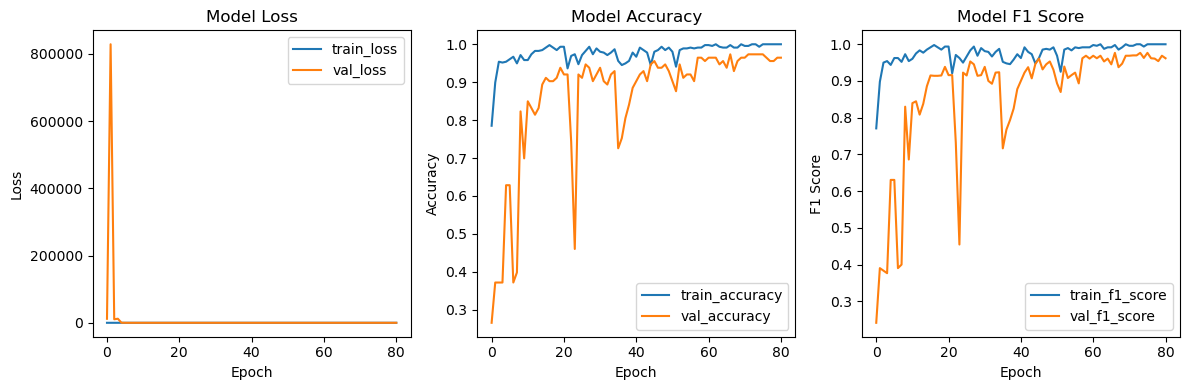

In [ ]:
plot_metrics(best_model.history)